<a href="https://colab.research.google.com/github/Yash-Bhatnagar-02/TSF-Grip-Internship-Tasks/blob/main/Grip_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
---
# Task #2 : Prediction using unsupervised ML: KMeans Clustering
---
---

In [1]:
import numpy as np
import matplotlib.pyplot as mtp
import pandas as pd
from sklearn import datasets
import sklearn.metrics as sm

# **Loading the dataset**

In [2]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)

In [3]:
features = df[df.columns[0:4]]
features.sample(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
138,6.0,3.0,4.8,1.8
107,7.3,2.9,6.3,1.8
45,4.8,3.0,1.4,0.3
20,5.4,3.4,1.7,0.2
42,4.4,3.2,1.3,0.2
89,5.5,2.5,4.0,1.3
149,5.9,3.0,5.1,1.8
72,6.3,2.5,4.9,1.5
63,6.1,2.9,4.7,1.4
70,5.9,3.2,4.8,1.8


# **Getting the primary information about the dataset**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [5]:
df.shape


(150, 4)

In [6]:
df.size

600

# **Feature scaling of the features**

In [7]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
scaled_features = MinMaxScaler().fit_transform(features[df.columns[0:6]])
pca = PCA(n_components=2).fit(scaled_features)
features_2d = pca.transform(scaled_features)
features_2d[0:10]

array([[-0.63070293,  0.10757791],
       [-0.62290494, -0.10425983],
       [-0.6695204 , -0.05141706],
       [-0.65415276, -0.10288487],
       [-0.64878806,  0.13348758],
       [-0.53527278,  0.28961572],
       [-0.65653779,  0.01072449],
       [-0.6257805 ,  0.05713354],
       [-0.6756435 , -0.20070328],
       [-0.64564462, -0.06720801]])

# **Finding the optimum number of clusters for k-means classification**

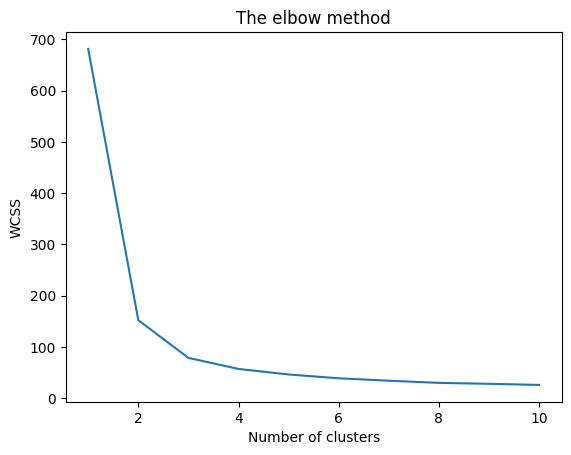

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
x = df.iloc[:, [0, 1, 2, 3]].values
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# **Fitting the data and Predicting the clusters**

In [11]:
from sklearn.cluster import KMeans
# Create a model based on 3 centroids
model = KMeans(n_clusters=3, init='k-means++', n_init=100, max_iter=1000)

km_clusters = model.fit_predict(features.values)
km_clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

# **Visualization of the clusters formed**

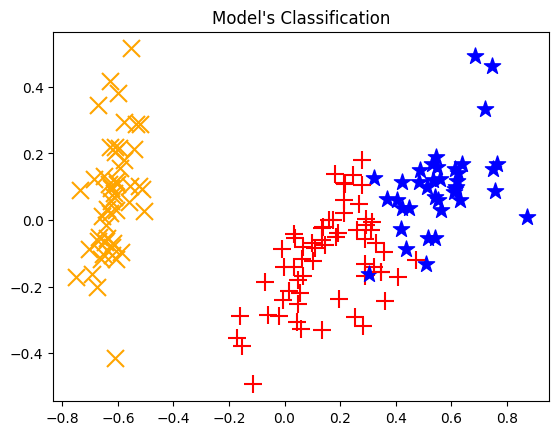

In [14]:

def plot_clusters(samples, clusters):
    col_dic = {0:'blue',1:'orange',2:'red'}
    mrk_dic = {0:'*',1:'x',2:'+'}
    colors = [col_dic[x] for x in clusters]
    markers = [mrk_dic[x] for x in clusters]
    for sample in range(len(clusters)):
        plt.scatter(samples[sample][0], samples[sample][1], color = colors[sample], marker=markers[sample], s=150)
    plt.title("Model's Classification")
    plt.show()

plot_clusters(features_2d, km_clusters)